In [1]:
import pandas as pd
import numpy as np

import matplotlib as m_plt
from matplotlib import pyplot as plt
import matplotlib.mlab as mlabQ

import seaborn as sns

from copy import copy
from pprint import pprint

import sys
import os

import personal_plotter as p_plt

# Practica VII
_ _ _
___
_ _ _


## 1.- Data 1 - Boston House Pricing

### 1.1.- Retrieving Data

#### 1.1.1.- Reading Data

In [2]:
try :
    boston_dataset = pd.read_csv("./boston/housing.data", sep="\t", header=None)
    boston_dataset.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
except:
    print("ERROR, DATA NOT LOADED")
else:
    print("""DATA SUCCESSFULLY LOADED\n
    \tRows\t:\t{:d}\t|\tColumns\t:\t{:d}""".format(boston_dataset.shape[0], boston_dataset.shape[1]))

DATA SUCCESSFULLY LOADED

    	Rows	:	506	|	Columns	:	14


#### 1.1.2.- Data Labels
0. **CRIM**      :  *per capita crime rate by town*
2. **ZN**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
3. **INDUS**     :  *proportion of non-retail business acres per town*
4. **CHAS**      :  *Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)*
5. **NOX**       :  *nitric oxides concentration (parts per 10 million)*
6. **RM**        :  *average number of rooms per dwelling*
7. **AGE**       :  *proportion of owner-occupied units built prior to 1940*
8. **DIS**       :  *weighted distances to five Boston employment centres*
9. **RAD**       :  *index of accessibility to radial highways*
10. **TAX**      :  *full-value property-tax rate per \$10 000*
11. **PTRATIO**  :  *pupil-teacher ratio by town*
12. **B**        :  *1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town*
13. **LSTAT**    :  *\% lower status of the population*
14. **MEDV**     :  *Median value of owner-occupied homes in \$1000's*

#### 1.1.3.- Viewing Data

In [3]:
boston_dataset.iloc[4:12, :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311.0,15.2,396.90,13.27,18.9


### 1.2.- Attributes Choose

#### 1.2.1.- Choosed Attributes and Hypothesis

**Hypothesis** : The houses near to the industrial center are more expensive because being Boston a mainly industrial center (at that time) far places implies more time expended traveling to there.

**Attributes**

* **ZN (id 1)**        :  *proportion of residential land zoned for lots over 25,000 sq.ft.*
    > Available Places Criteria I, Supply
* **RM (id 5)**        :  *average number of rooms per dwelling*
    > Available Places Criteria II, Supply
* **DIS (id 7)**       :  *weighted distances to five Boston employment centres*
    > "Nearly to" Criteria, Demand
* **RAD (id 8)**       :  *index of accessibility to radial highways*
    > Variable who affects directly in the traveling time, Demand.
* **MEDV (id 13)**     :  *Median value of owner-occupied homes in \$1000's*
    > Affects directly in the rent value, Expensiveness.
   
#### 1.2.2.- Selecting Data

In [4]:
case_data_Boston = boston_dataset.iloc[:,[1, 5, 7, 8, 13]].copy()
case_data_Boston.columns = ["Available x25K ft", "Rooms", "Distance", "Accessibility", "Cost x 1K"]

##### 1.2.2.1.- Normalize

In [5]:
case_data_Boston_norm = (case_data_Boston - case_data_Boston.min())
case_data_Boston_norm = (case_data_Boston_norm / case_data_Boston_norm.max())

not_norm_case_data_Boston = case_data_Boston.copy()

case_data_Boston = case_data_Boston_norm

##### 1.2.2.2.- Creating Targets

In [6]:
# not normalized

temp_targets = p_plt.make_targets(not_norm_case_data_Boston.iloc[:, 4], samples=3)
not_norm_case_data_Boston["target"] = temp_targets

# normalized

temp_targets = p_plt.make_targets(case_data_Boston.iloc[:, 4], samples=3, labels=["Low Cost", "Normal Cost", "High Cost"])

case_data_Boston["target"] = temp_targets

### 1.3 Data Exploration

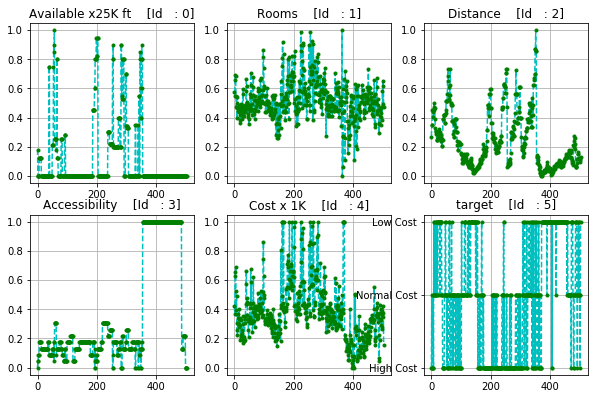

In [7]:
p_plt.dummy_DataFrame_plotter(case_data_Boston,
                        plot_size=(10,10), 
                        mixed_style=True,
                        plot_style=["c--", "g."], 
                        grid=True).show()

## 2.- Data Balance

#### 1.3.1 Histogram

***Below : 1rst Not Normalize Data, 2nd Normalize Data (normal base)***

##### PLOT

In [8]:
target_names = case_data_Boston['target'].unique()
columns = case_data_Boston.columns.tolist()

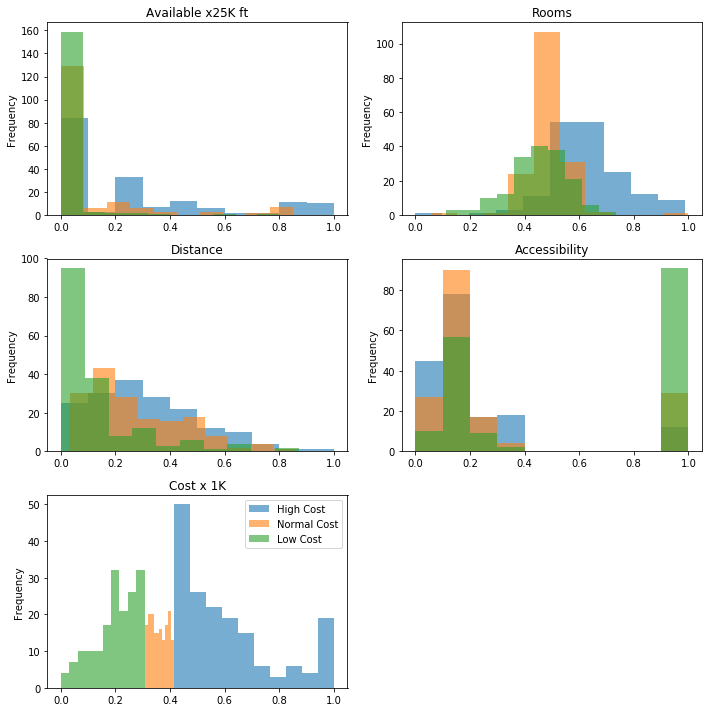

In [9]:
p_plt.multy_hist(case_data_Boston, columns, target_names, alpha_value=0.6).show()

C:\Users\10659682\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


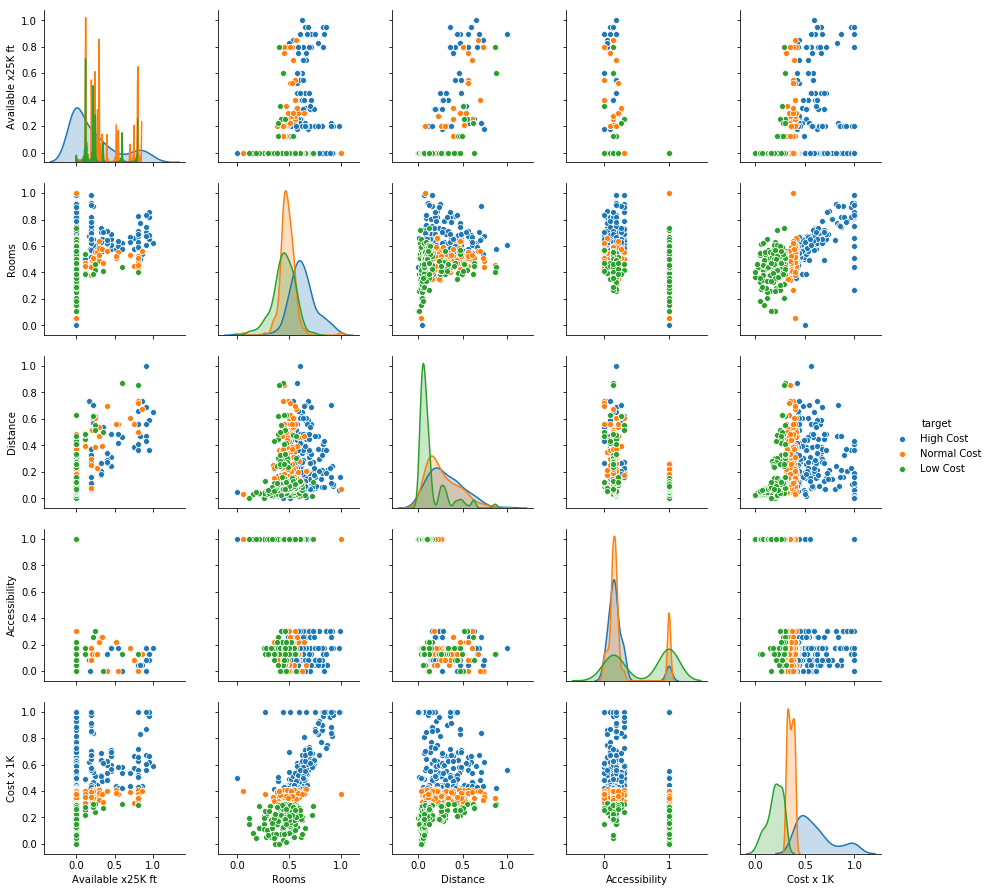

In [10]:
sns.pairplot(data=case_data_Boston, vars=columns[:-1], hue='target')
plt.show()

In [11]:
stats = not_norm_case_data_Boston.describe()
print(stats)

       Available x25K ft       Rooms    Distance  Accessibility   Cost x 1K  \
count         506.000000  506.000000  506.000000     506.000000  506.000000   
mean           11.363636    6.284634    3.795043       9.549407   22.532806   
std            23.322453    0.702617    2.105710       8.707259    9.197104   
min             0.000000    3.561000    1.129600       1.000000    5.000000   
25%             0.000000    5.885500    2.100175       4.000000   17.025000   
50%             0.000000    6.208500    3.207450       5.000000   21.200000   
75%            12.500000    6.623500    5.188425      24.000000   25.000000   
max           100.000000    8.780000   12.126500      24.000000   50.000000   

           target  
count  506.000000  
mean     2.001976  
std      0.819319  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      3.000000  
max      3.000000  


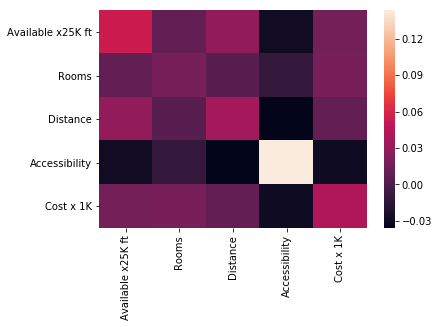

In [12]:
p_plt.heat_plot(case_data_Boston.iloc[:, :-1], pd.DataFrame.cov).show()

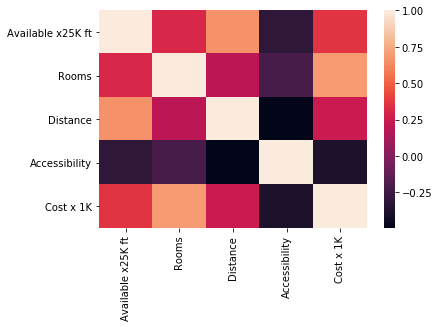

In [13]:
p_plt.heat_plot(case_data_Boston.iloc[:, :-1], pd.DataFrame.corr).show()

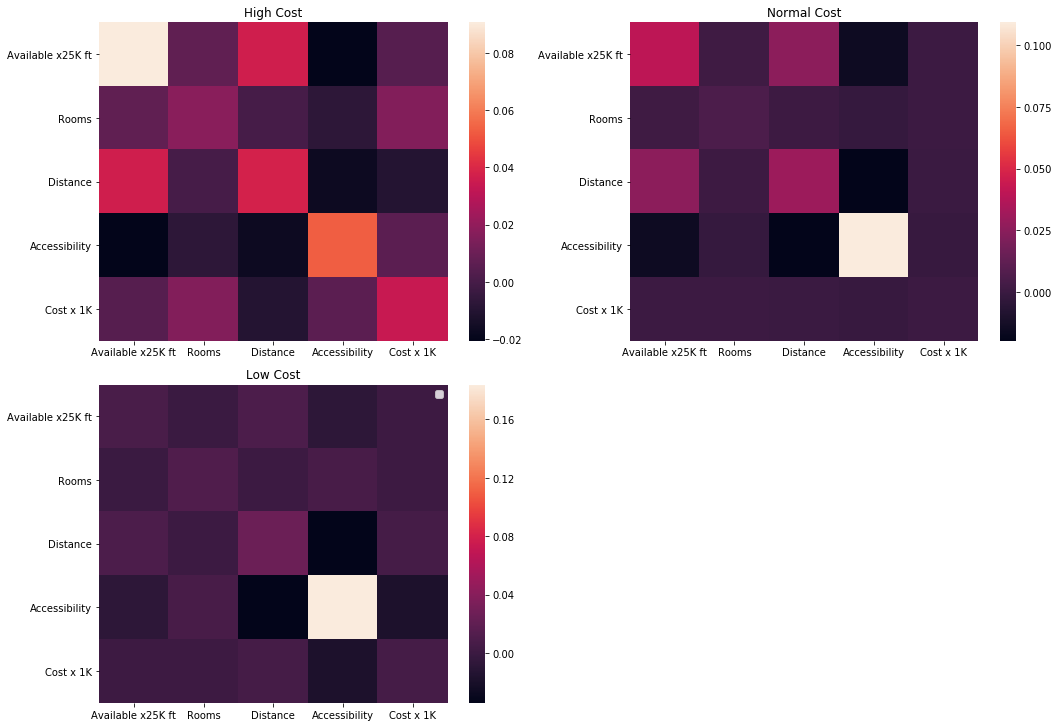

In [14]:
p_plt.multy_heat(case_data_Boston, columns, target_names, pd.DataFrame.cov).show()

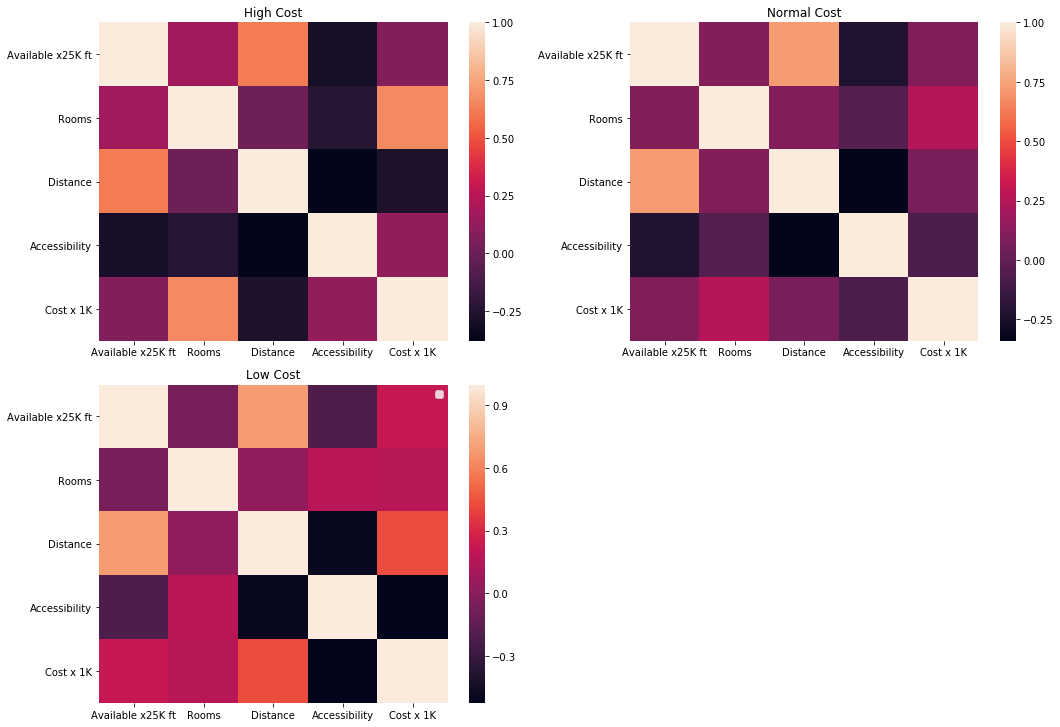

In [15]:
p_plt.multy_heat(case_data_Boston, columns, target_names, pd.DataFrame.corr).show()

### 1.4 Hypothesis Related Questions and Answers

#### 1.4.1 the more close residential center is from the Industrial zone, the denser are?

Using the parameters ***Available & Rooms*** as variables in the formula:

$$ Available = av \land Rooms = ro $$

$$ \frac{av - \min{(av)}}{\max{(av)}} \cdot {ro} = \rho_{people} $$

considering the plotted data in the pair plot and the correlation matrix, this hypothesis is conclusive, in its strong and weak version, its true.
    
 - [x] Strong Hypothesis: + Near to, + People

 - [x] Weak Hypothesis: - Near To, - People

#### 1.4.2 [1.4.1] being one of the closers,  implies more accessibility?

Yes, but not only. The more closest is, it is more probably have better accessibility.

In both cases, the values are enclosed almost in the confidence interval, more even, the "outliers" values are big enough to create, in the correlation matrix, a value of less than 0.3.

This hypothesis was reinforced the last time, and now is denied, so, it is a reason to consider a viable option but not a proved hypothesis

#### 1.4.3 rent increased the more nearly you are?

yes, but this only happens in the left skew, if we check the right one; the expected behavior fails.
Seeing the result in the pair plot and correlation matrix, it's possible to say, that left skew, isn't so significative in the conclusion, in the pair plot we can see, they are almost clustered by distance, and in the correlation matrix, they are correlated

#### 1.5 Issues

* The data isn't normalize
* NaNs Values doesn't exist, its possible was a mistake during the data reading or my misinterpretation.
* Small and not so detailed dictionary of variables (Still a problem)

_ _ _
___
_ _ _